# Sueldos de posiciones de ciencia de datos (2020-2023)

### Autor: Christian Jaime
### Fuente: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

El set de datos seleccionado muestra los títulos de las posiciones relacionadas a ciencias de datos, así como su salario para el año 2023.

In [ ]:
import pandas as pd
import io
import requests
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset

url="https://raw.githubusercontent.com/stormKx18/08MBID---Visualizacion-de-Datos/main/TP/ds_salaries.csv"

s=requests.get(url).content

data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data[0:5]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
data.salary_in_usd.mean()

137570.38988015978

De las posiciones existentes, se puede observar que la que percibe el mayor sueldo es la posición de Research Scientist por la cantidad de $450,000 USD anuales.

El sueldo promedio de las posiciones del área de ciencia de datos es de 137,570.38 USD, siendo 2.27 veces el sueldo promedio en Estados Unidos para 2022, que fué de 60,575 USD.

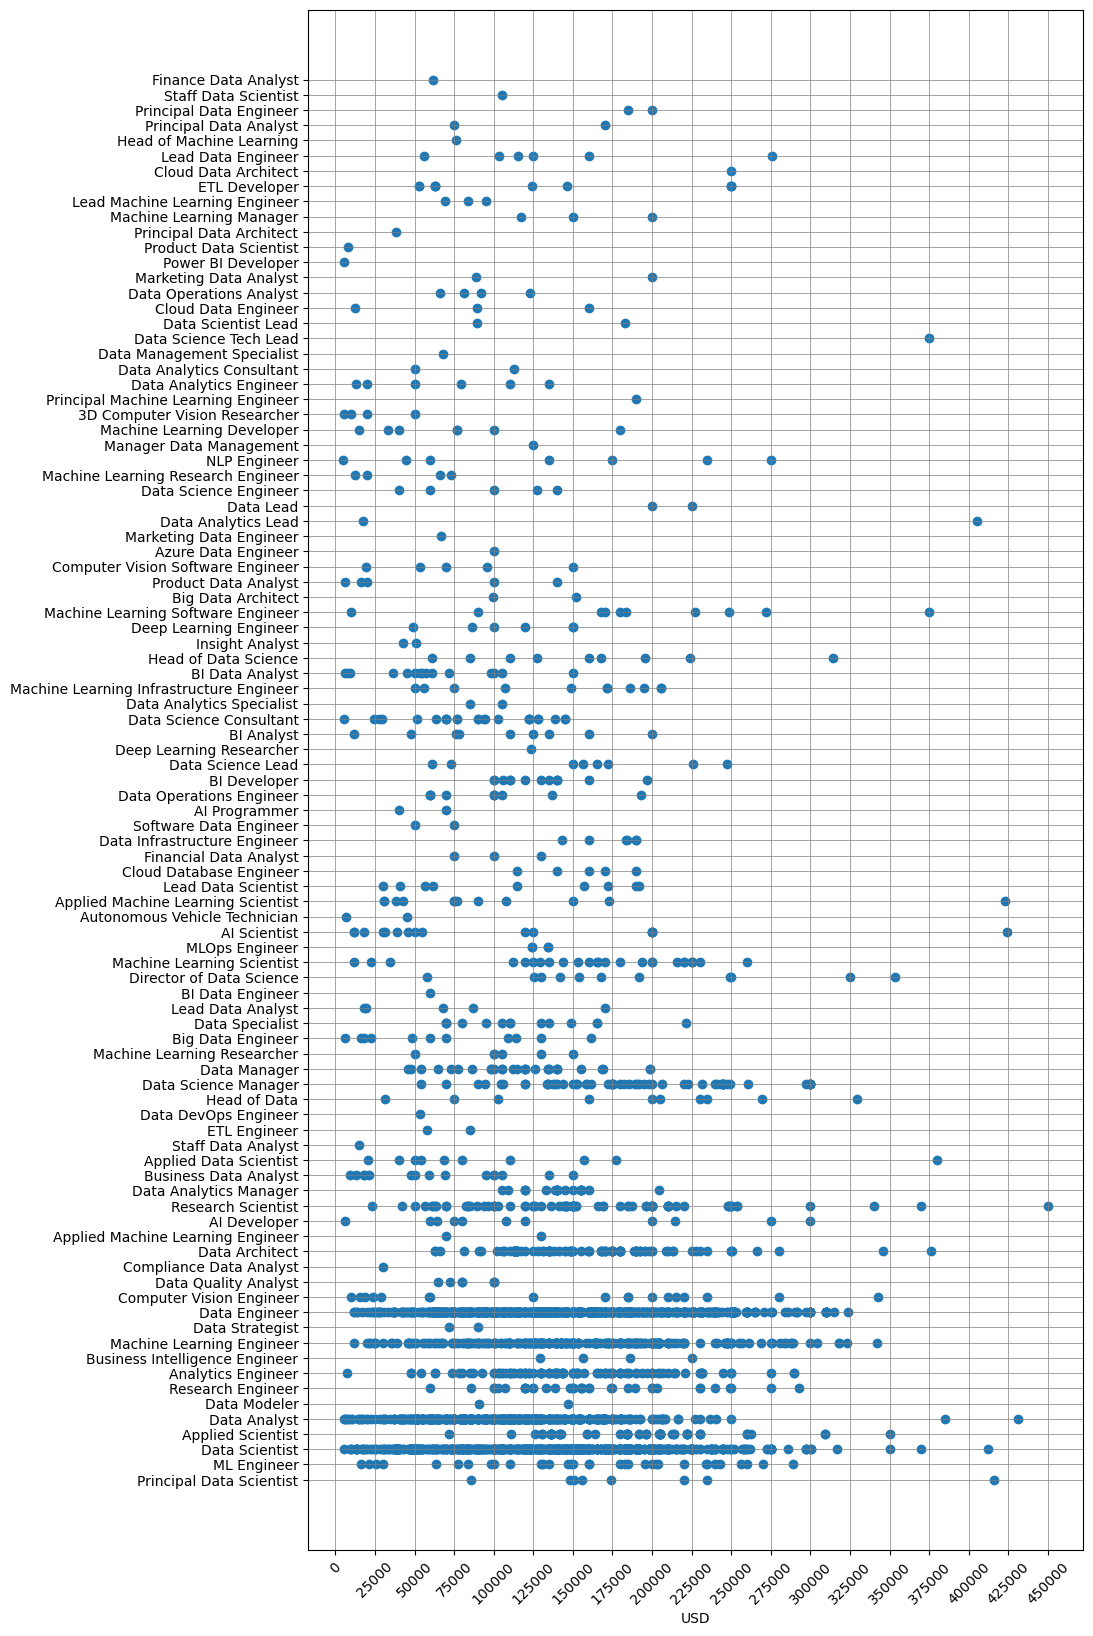

In [ ]:
xvals = data.salary_in_usd
yvals = data.job_title

colors = np.array(np.arange(0, len(yvals), step=1))

plt.figure(figsize=(10,20))
plt.xticks(np.arange(0, 500000, step=25000),rotation = 45)
plt.xlabel('USD')
plt.grid(color='gray', linestyle='-', linewidth=0.5)

fig = plt.scatter(x=xvals, y=yvals)

De las empresas que contratan éste tipo de profesionistas, más del 85% son empresas de los Estados Unidos.

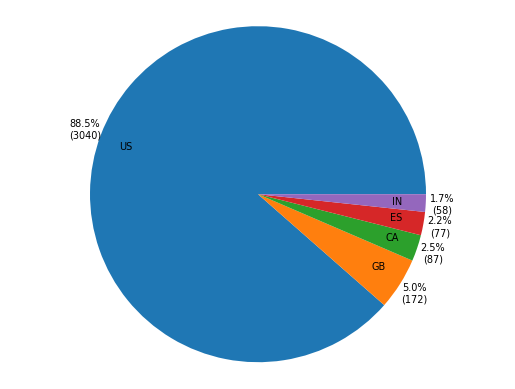

In [ ]:
q = data.company_location.value_counts()
labels = q.index.to_numpy()[0:5]
sizes = q.values[0:5]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), pctdistance=1.1, labeldistance=0.8, textprops={'fontsize': 7})
ax1.axis('equal')

plt.show()

De todos las personas que trabajan para empresas de Estados Unidos, el 98.7% reside en el mismo país. Del 1.3% por ciento restante, el 17.1% reside en la India, seguidos por residentes de España y Gran Bretaña con el 73%

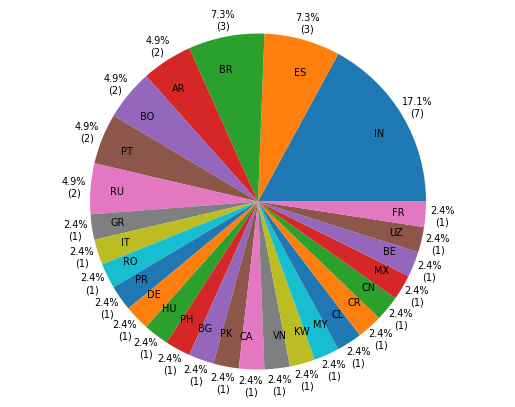

In [ ]:
residence = data.employee_residence[data.company_location == 'US'].value_counts()
labels = residence.index.to_numpy()
sizes = residence.values

labels = residence.index.to_numpy()[1:]
sizes = residence.values[1:]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), pctdistance=1.1, labeldistance=0.8, textprops={'fontsize': 7})
ax1.axis('equal')

plt.show()